# Analyzing Sales in Python, Lesson 4 Hands On Part - 2

## Import packages

In [33]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison


## Load data

In [34]:
Sales_Avocados = pd.read_csv("avocados.csv")

Sales_Avocados.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Question setup

In [35]:
# Does the total volume of avocados sold differ between Indianapolis, Orlando, and PhoenixTucson?

# In order to answer this question, our x, or independent variable, will be the region, 
# which has three levels: Indianapolis, Orlando, and PhoenixTucson. Our y, or dependent variable, 
# will be the Total Volume.

## Data Wrangling

### Focusing on the Three regions - Indianapolis, Orlando, and PhoenixTucson
 

In [36]:
# The data has many more categories than three, so we will need to filter the dataset by the region we want. 
# Indianapolis, Orlando, and PhoenixTucson.

regions = ['Indianapolis', 'Orlando','PhoenixTucson']
Sales_Avocados1 = Sales_Avocados['region'].isin(regions)
Sales_Avocados2 = Sales_Avocados[Sales_Avocados1].copy()

Sales_Avocados2.region.value_counts()

Indianapolis     338
Orlando          338
PhoenixTucson    338
Name: region, dtype: int64

### Subsetting to Only the Variables Needed


In [37]:
# We only want to keep the two variables we'll need in our test: 'Total Volume' and 'region'.

Sales_Avocados3 = Sales_Avocados2[['Total Volume','region']]

### Changing the DV, 'Total Volume', to integer

In [38]:
# Your dependent variable will need to be an integer. 

Sales_Avocados3.info()

Sales_Avocados3['Total Volume'] = Sales_Avocados3['Total Volume'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 988 to 18008
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  1014 non-null   float64
 1   region        1014 non-null   object 
dtypes: float64(1), object(1)
memory usage: 23.8+ KB


/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_17590/711553801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sales_Avocados3['Total Volume'] = Sales_Avocados3['Total Volume'].astype(int)


### Recoding region to numeric too

In [39]:
# The post-hocs and assumptions won't take any string values, so we'll need to recode region as well:

def recode (series):
    if series == "Indianapolis": 
        return 0
    if series == "Orlando": 
        return 1
    if series == "PhoenixTucson": 
        return 2

Sales_Avocados3['regionR'] = Sales_Avocados3['region'].apply(recode)


/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_17590/2995765802.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sales_Avocados3['regionR'] = Sales_Avocados3['region'].apply(recode)


In [40]:
Sales_Avocados3.head()

,Total Volume,region,regionR
988,123096,Indianapolis,0
989,116353,Indianapolis,0
990,125342,Indianapolis,0
991,145740,Indianapolis,0
992,108444,Indianapolis,0


### Dropping the original region Variable

In [41]:
# Since we now have three variables again, we have to drop the original region variable.

Sales_Avocados4 = Sales_Avocados3[['regionR','Total Volume']]

Sales_Avocados4.head()

,regionR,Total Volume
988,0,123096
989,0,116353
990,0,125342
991,0,145740
992,0,108444


In [42]:
# And finally, we are prepared to run a one-way ANOVA and all it's assumptions and post-hoc tests.

## Running the assumptions

### Normality

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

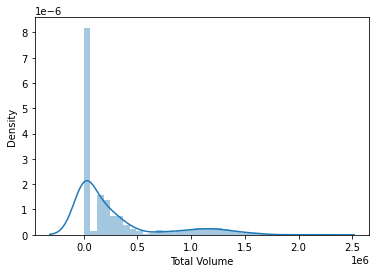

In [43]:
# We only need to test for the normality of the dependent variable, since the IV is categorical.

sns.distplot(Sales_Avocados4['Total Volume'])

In [44]:
# Looks like that isn't normal in any way - it is very highly positively skewed. So, we'll need to transform 
# Total Volume by taking the square root or the log.

Sales_Avocados4['TotalVolumeSQRT'] = np.sqrt(Sales_Avocados4['Total Volume'])

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalVolumeSQRT', ylabel='Density'>

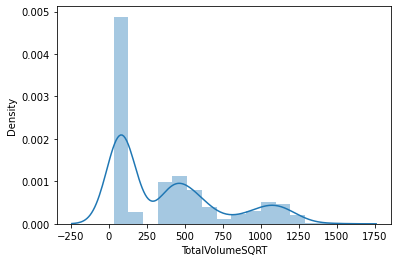

In [45]:
# Plotting

sns.distplot(Sales_Avocados4['TotalVolumeSQRT'])

In [46]:
# Let's try log, since it doen't look normal:

Sales_Avocados4['TotalVolumeLOG'] = np.log(Sales_Avocados4['Total Volume'])

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalVolumeLOG', ylabel='Density'>

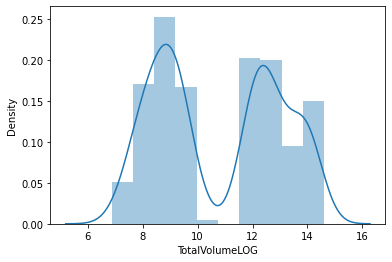

In [47]:
# Plotting

sns.distplot(Sales_Avocados4['TotalVolumeLOG'])

In [48]:
# The plot isn't normal but much better than the first one.

## Homogeneity of Variance

In [49]:
# We can test for homogeneity of variance using either Bartlett's test or Fligner's Test.
# Bartlett's test is for when data is normally distributed, and Fligner's test is for when data is
# non-parametric. 
# No matter which test we are using, we are looking for a non-significant test. 
# The null hypothesis for both of these is that the data has equal variance, so we'd like to have a 
# p value of > .05. Since we have corrected our data, we can use Bartlett's test.

### Bartlett's Test


In [50]:
# To do Bartlett's test, use the function scipy.stats.bartlett(), with the argument of the y data,
# followed by the x data.

scipy.stats.bartlett(Sales_Avocados4['TotalVolumeLOG'], Sales_Avocados4['regionR'])


BartlettResult(statistic=883.8333293750119, pvalue=3.2084549477506726e-194)

In [51]:
# The p value associated with this test is < .05, which means that unfortunately, we have violated the assumption
# of homogeneity of variance.

### Sample Size

In [52]:
# An ANOVA requires a sample size of at least 20 per independent variable.
# Looking at the data, the n is 18,249, so we are fine to proceed with this assumption!

### Independence

In [53]:
# There is no statistical test for the assumption of independence, so we can proceed!

## Computing ANOVAs


In [54]:
# In this case, our data did not meet this assumption, but for the purposes of learning and since there is NO WAY to compute 
# ANOVAs with unequal variance in Python, we'll calculate it.

In [55]:
stats.f_oneway(Sales_Avocados["Total Volume"][Sales_Avocados["region"]=='Indianapolis'],
                    Sales_Avocados["Total Volume"][Sales_Avocados["region"]=='Orlando'],
                    Sales_Avocados["Total Volume"][Sales_Avocados["region"]=='PhoenixTucson'])

F_onewayResult(statistic=174.05378837225294, pvalue=1.101276256457687e-65)

In [56]:
# Since the p value is less than .05, there is a significant difference in Total Volume between these three regions.



## Post Hocs

In [57]:
# Running post-hocs to figure out what groups significantly differed from each other using Tukey post hoc.

### Computing Post Hocs with Tukey's


In [58]:
# Here is the code for computing a Tukey's post hoc in Python:

postHoc = MultiComparison(Sales_Avocados4['TotalVolumeLOG'], Sales_Avocados4['regionR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.4292 0.0253 0.0424  0.816   True
     0      2   1.4767    0.0 1.0899 1.8635   True
     1      2   1.0475    0.0 0.6607 1.4343   True
--------------------------------------------------


In [59]:
# 0 stands for Indianapolis, 1 stands for Orlando, and 2 stands for PhoenixTucson. 
# If the value in the reject column is True, then this means there's a significant difference in the means
# between those groups. So, there is a significant difference between the total volume between the three regions.
# To check what is that difference, wewill have to examine the means.

## Determine Means and Draw Conclusions


In [60]:
# Determine which regions had the highest and lowest Total Volume.

Sales_Avocados4.groupby('regionR').mean()

,Total Volume,TotalVolumeSQRT,TotalVolumeLOG
regionR,,,
0,89536.180473,240.444255,10.157488
1,173551.840237,324.643652,10.586681
2,578825.887574,585.836582,11.634147


In [61]:
# Looking at the table we can say ,
# PhoenixTucson has the highest total volume, and Indianapolis having the least total volume of the three.

#  ------------------- Part - 2 Conclusion --------------------------- # 

##  PhoenixTucson has the highest total volume, and Indianapolis having the least total volume of the three.